1. Importing data files into python(Jypiter notebook) through Pandas..  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
df=pd.read_csv(r"C:\Users\sanju\OneDrive\Desktop\imports-85.data", header=None) #reading the csv file and saying it doesn't have any headers
print(df)      

2. As the file contains no header, thus we will add headers.

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style","drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type", "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mg","highway-mpg","price"]
df.columns=headers     #adding the headres in columns
print(df.head(5))      #printing only first 5 rows 
print(df['fuel-type']) #printing only a column data

3. indentifying and cleaning missing values.

In [ ]:
import numpy as np
df.replace('?',np.nan, inplace=True)     #replacing ? with nan
print(df)

4. Identifying missing values and counting  no of them.

In [ ]:
df1=df.isnull()                          #indentifying missing values
for column in df1.columns.values.tolist():
    print(column)
    print (df1[column].value_counts())   #counting no of missing values. 
    print("")    

5. Clearing rows with missing values.

In [ ]:
df.dropna(axis=0,inplace=True)  # clearing entire rows with missing values.  
print(df)

6. Checking wheater all of the data is of same type or not and modifying them.

In [ ]:
print(df.dtypes) # checking the data types of columns
df[['normalized-losses','horsepower','price','peak-rpm']]=df[['normalized-losses','horsepower','price','peak-rpm']].astype('int')
df[['bore','stroke']]=df[['bore','stroke']].astype('float')
print(df.dtypes) # checking the updated data types of columns

7. correlation between variables(Numericals)

In [ ]:
df[['bore','stroke','compression-ratio','horsepower']].corr  #correaltion between selcted columns

8. plotting scatter plots to show linear realtionship between two variables. 

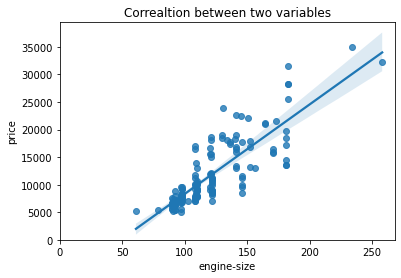

,engine-size,price
engine-size,1.000000,0.841496
price,0.841496,1.000000


In [42]:
sns.regplot(x='engine-size',y='price',data=df) #using seaborn statistical fuctions. more about arguments on copy
plt.ylim(0,)                                   #sets upper and lower limit of Y-axis 
plt.xlim(0,)                                   #sets upper and lower limit of X-axis
plt.title('Correaltion between two variables')
plt.show()
df[['engine-size','price']].corr()             #calculating correaltion value

9. Correlation betweeen categorical values.
   9.1 Box-Plot 